In [15]:
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import collections
import html.parser

from textblob import TextBlob
import tweepy
# import twitter_credentials
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv

# Twitter Credentials

In [16]:
# Variables that contains the user credentials to access Twitter API 

ACCESS_TOKEN = "..."
ACCESS_TOKEN_SECRET = "..."
CONSUMER_KEY = "..."
CONSUMER_SECRET = "..."

# Twitter Authenticator

In [17]:
### TWITTER AUTHENTICATOR ###

class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
        return auth

# Twitter Client

In [18]:
### TWITTER CLIENT ###

class TwitterClient():
    
    def __init__(self,twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self,num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline,id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self,num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends,id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list 
    
    def get_home_timeline_tweets(self,num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline,id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

    def get_tweets_from_hashtag_from_particular_location(self,hashtag , location , count):
        tweets = []
        for tweet in tweepy.Cursor(api.search,q=hashtag,lang="en",geocode=location).items(count):
            tweets.append(tweet)
        return tweets

# Tweet Analyzer

In [19]:
### TWEET ANLAYZER ###

class TweetAnalyzer():
    #Functionality for analyzing and categorizing content from tweets.

     def clean_tweet(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

     def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

     def tweets_to_data_frame(self,tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['text'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['user'] = np.array([tweet.user.screen_name for tweet in tweets])
        df['name'] = np.array([tweet.user.name for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweet_count'] = np.array([tweet.retweet_count for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['location'] = np.array([tweet.user.location for tweet in tweets])
        df['sentiment'] = np.array([self.analyze_sentiment(txt) for txt in df['text']])
        return df

# Function to get frequently used hashtags

In [20]:
#function for getting most frequently used hashtags

def get_hashtags(texts):
    hash_tag_list = []
    for text in texts:
        for word in text.split():
            if word[0] == '#':
                hash_tag_list.append(word.lower())
    frequency = {}
    for item in set(hash_tag_list):
        frequency[item] = hash_tag_list.count(item)
        
    res = {val[0] : val[1] for val in sorted(frequency.items(), key = lambda x: (-x[1], x[0]))}
    return res

# MAIN

In [21]:
if __name__ == "__main__":

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    
    api = twitter_client.get_twitter_client_api()
    
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline, "LeoDiCaprio" ).items(2000):
        tweets.append(tweet)
        
    print(len(tweets))
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    print(len(df.index))
    

2000
2000


# Printing DataFrame

In [41]:
df.head(10)

,text,id,user,name,likes,retweet_count,date,source,location,sentiment
0,https://t.co/XNxhIEg49E,1329108352006189058,LeoDiCaprio,Leonardo DiCaprio,4184,301,2020-11-18 17:04:59,Twitter Web App,"Los Angeles, CA",0
1,👉 https://t.co/2kQkh8IlXA https://t.co/whjr8pwnjH,1328740358545571841,LeoDiCaprio,Leonardo DiCaprio,3829,375,2020-11-17 16:42:42,Twitter Web App,"Los Angeles, CA",0
2,https://t.co/kVB6dQXLEf,1327626290375999492,LeoDiCaprio,Leonardo DiCaprio,5649,436,2020-11-14 14:55:48,Twitter for iPhone,"Los Angeles, CA",0
3,The @NG_PristineSeas team conducted an expedit...,1327334061568770048,LeoDiCaprio,Leonardo DiCaprio,1587,142,2020-11-13 19:34:35,Twitter Web App,"Los Angeles, CA",0
4,"Today, Tristan da Cunha, the most remote inhab...",1327333913606307840,LeoDiCaprio,Leonardo DiCaprio,5793,644,2020-11-13 19:34:00,Twitter Web App,"Los Angeles, CA",1
5,#Georgia voters 👇 https://t.co/UoFKjSxZrB,1326920050616356864,LeoDiCaprio,Leonardo DiCaprio,4997,535,2020-11-12 16:09:27,Twitter Web App,"Los Angeles, CA",0
6,https://t.co/IDgdDSQ7Kw,1326603556854509568,LeoDiCaprio,Leonardo DiCaprio,5064,320,2020-11-11 19:11:49,Twitter Web App,"Los Angeles, CA",0
7,"In #Antarctica: The Waking Giant, explorer @Se...",1326568601134931969,LeoDiCaprio,Leonardo DiCaprio,6040,651,2020-11-11 16:52:55,Twitter Web App,"Los Angeles, CA",1
8,#Arizona voters - this deadline is today 👇 htt...,1326201532769992704,LeoDiCaprio,Leonardo DiCaprio,3958,433,2020-11-10 16:34:19,Twitter Web App,"Los Angeles, CA",0
9,RT @2020uptous: Leave no ballot uncounted. htt...,1324513449007828998,LeoDiCaprio,Leonardo DiCaprio,0,241,2020-11-06 00:46:29,Twitter for iPhone,"Los Angeles, CA",0


In [133]:
df.to_csv('dataset.csv')

# Read cell to create dataframe from pre-saved dataset

In [3]:
df = pd.read_csv('dataset.csv')

# Plot of sentiment Analysis

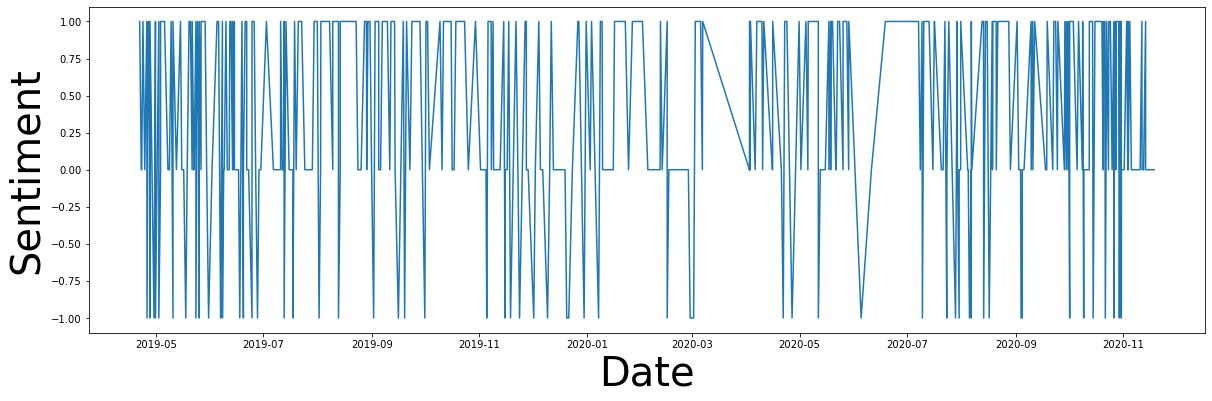

In [23]:
    #Plot of sentiment Analysis
    
    # 1 --> Positive Sentiment
    # 0 --> Neutral 
    # -1 --> Negative Sentiment
    
    df1 = df.head(500)
    x = df1['date']
    y = df1['sentiment']
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    axes = plt. gca()
    axes. xaxis. label. set_size(40)
    axes. yaxis. label. set_size(40)
    plt.show()

# Plot of number of likes 

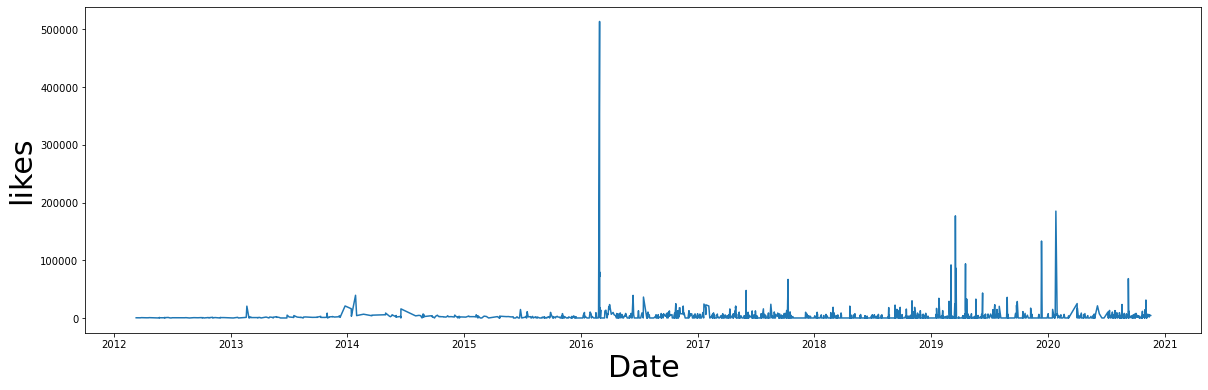

In [24]:
    #Plot of likes 
    
    x = df['date']
    y = df['likes']
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('likes')
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    axes = plt. gca()
    axes. xaxis. label. set_size(30)
    axes. yaxis. label. set_size(30)
    plt.show()

# Plot of Retweet Count

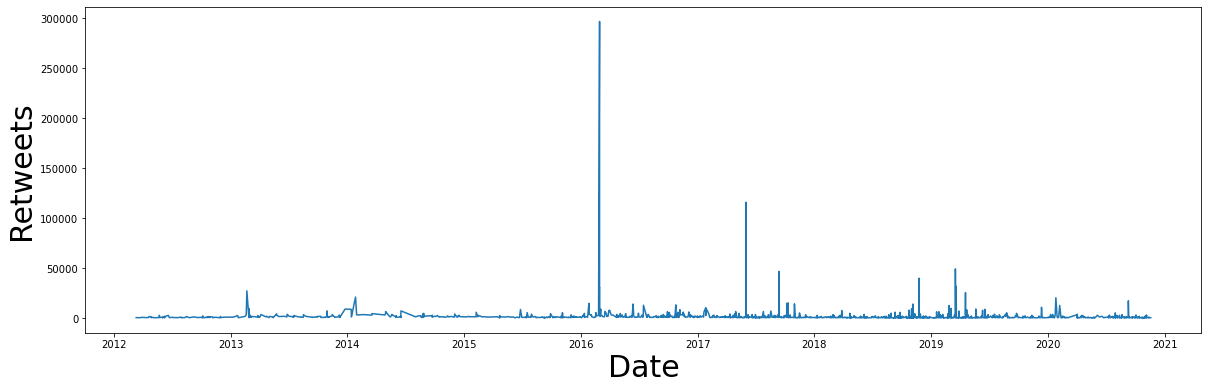

In [25]:
    #Plot of Retweet count
    
    x = df['date']
    y = df['retweet_count']
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('Retweets')
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    axes = plt. gca()
    axes. xaxis. label. set_size(30)
    axes. yaxis. label. set_size(30)
    plt.show()

# Getting Frequently used hashtag

In [26]:
texts = df['text']
frequently_used_hashtags = get_hashtags(texts)

lst1 = list(frequently_used_hashtags.keys())
lst2 = list(frequently_used_hashtags.values())
dF = pd.DataFrame(list(zip(lst1, lst2)), columns =['Name', 'val']) 
dF1 = dF.head(3)
print(dF1)

              Name  val
0   #climatechange   75
1  #beforetheflood   26
2  #parisagreement   25


# Bar Plot of Frequently used hashtags

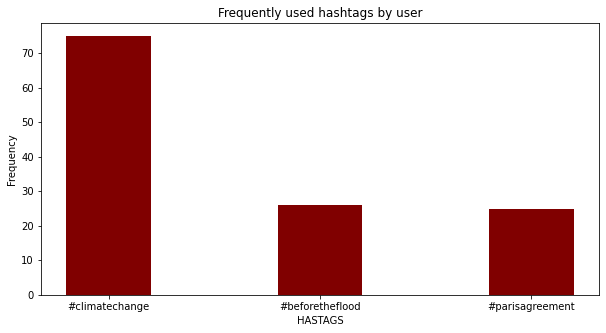

In [27]:

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dF1['Name'],dF1['val'], color ='maroon', width = 0.4) 
  
plt.xlabel("HASTAGS") 
plt.ylabel("Frequency") 
plt.title("Frequently used hashtags by user") 
plt.show() 

# Making WordCloud

In [28]:
from wordcloud import WordCloud, STOPWORDS

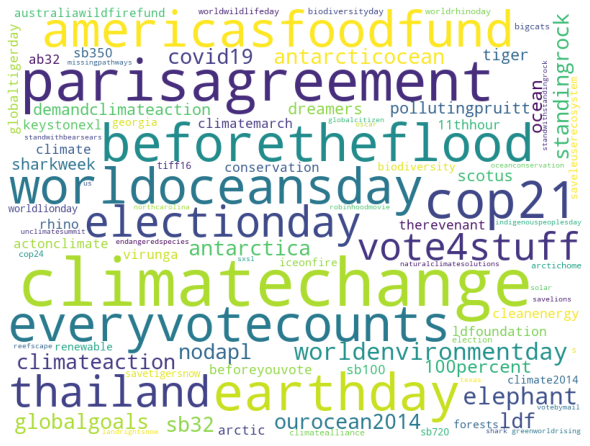

In [29]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dF.Name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Media Recommender

In [30]:
from apiclient.discovery import build
import argparse
import datetime
import re

## Youtube Credentials

In [31]:
DEVELOPER_KEY = "..."
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
youtube = build(YOUTUBE_API_SERVICE_NAME,YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

In [32]:
video_ID = []
video_Title = []
Topics = dF1['Name'].tolist()
print(len(Topics))
print(Topics)

3
['#climatechange', '#beforetheflood', '#parisagreement']


In [33]:
import operator
for topic in Topics:
    search_response = []
    response_page = youtube.search().list(q=topic, part="id,snippet", type="video", maxResults=10).execute()
    search_response.append(response_page)
    
    id_list = []
    vid = []
    for v in search_response:
        for v_item in v['items']:
            id_list.append(v_item['id']['videoId'])
    print(topic + " YouTube video suggestions" + "\n")
    for vid_Id in id_list:
        video_response = youtube.videos().list(part='snippet,contentDetails,statistics',id = vid_Id).execute() 
        for item in video_response['items']:
            if 'likeCount' not in item['statistics']:
                continue
            if 'viewCount' not in item['statistics']:
                continue
            views = item['statistics']['viewCount']
            likes = item['statistics']['likeCount']
            title = item['snippet']['title']
            value = views + likes
            vid.append({'id' : vid_Id, 'title' : title, 'value' : value, 'views' : views, 'likes' : likes})

    vid = sorted(vid, key = lambda i: i['value'],reverse=True)
    print("Title : " + vid[0]['title'] + " Link : " + 'https://www.youtube.com/watch?v=' + vid[0]['id'])
    print("Title : " + vid[1]['title'] + " Link : " + 'https://www.youtube.com/watch?v=' + vid[1]['id'])
    print("\n")

#climatechange YouTube video suggestions

Title : Melting arctic ice fuels climate change and extreme weather events | DW News Link : https://www.youtube.com/watch?v=hjhj7lEVFZU
Title : NASA's Research on Climate Change | Above and Beyond Link : https://www.youtube.com/watch?v=8Rvl6z80baI


#beforetheflood YouTube video suggestions

Title : Electricity in India | Before the Flood Link : https://www.youtube.com/watch?v=Ia5fMomBXbE
Title : Leonardo DiCaprio discovers how our diet is effecting climate change | Before The Flood Documentry Link : https://www.youtube.com/watch?v=KHIrbyd-5yo


#parisagreement YouTube video suggestions

Title : (Mock TEST 31) Paris Agreement Top 25 Important MCQs For NTA UGC NET Paper 1 June 2020 & Other Exams Link : https://www.youtube.com/watch?v=mg5g94seHGE
Title : Paris Agreement Environment Save or Not save | Greto thunberk | Tamil Link : https://www.youtube.com/watch?v=fHvNsjmq6UI




# Visualization on Particular hashtag

In [36]:
twitter_client1 = TwitterClient()
tweet_analyzer1 = TweetAnalyzer()

hashtag = "#Election2020"

location_America = "39.047344,-95.675156,1400km"   #latitude and longitude of location(here America)

api = twitter_client1.get_twitter_client_api()

tweets_America = twitter_client1.get_tweets_from_hashtag_from_particular_location(hashtag,location_America,1000)
df_America = tweet_analyzer1.tweets_to_data_frame(tweets_America)

In [40]:
df_America.head(10)

,text,id,user,name,likes,retweet_count,date,source,location,sentiment
0,@newtgingrich @JackPosobiec @ali My #Election2...,1329463577095380998,dev4bucks,Devin Brown,0,0,2020-11-19 16:36:31,Twitter for Android,"Troy, Ohio",0
1,RT @PeoplesParty_US: A few things are clear\n\...,1329463001808834560,snailz_db,blognow,0,1079,2020-11-19 16:34:14,Twitter for Android,,-1
2,@seanhannity My #Election2020 take. #lincolnpr...,1329462967755284484,dev4bucks,Devin Brown,1,1,2020-11-19 16:34:06,Twitter for Android,"Troy, Ohio",0
3,Join Voices for IR tonight as we discuss how t...,1329462960754974731,SIRspecialists,Society of Interventional Radiology,1,0,2020-11-19 16:34:04,Buffer,"Fairfax, VA",0
4,If Trump is the incumbent claiming he won in 2...,1329462944367775745,Mary_Nelson8,Mary Nelson,0,0,2020-11-19 16:34:00,Twitter Web App,"Illinois, USA",-1
5,"@realDonaldTrump @OANN Even if that were true,...",1329462830295375880,TheGuyNamedJoe,TheGuyNamedJoe,0,0,2020-11-19 16:33:33,Twitter Web App,"Omaha, NE",1
6,RT @AnicaPadilla: PIT BULL BAN REPEALED: Denve...,1329462823550914563,miahhhg,Mr. Bigg,0,4554,2020-11-19 16:33:32,Twitter for iPhone,"Moe City, Tx",1
7,@prayingmedic My #Election2020 take. #lincolnp...,1329462643091005445,dev4bucks,Devin Brown,0,0,2020-11-19 16:32:48,Twitter for Android,"Troy, Ohio",0
8,RT @txelectionlaw: Having practiced law for al...,1329462602410438656,ReistererRonald,Ronald Reisterer,0,57890,2020-11-19 16:32:39,Twitter for iPad,"Michigan, USA",0
9,There is solid point to this.\n\nAmerica has a...,1329462500790857729,AzlanSalims,Saddam A. Salim,0,0,2020-11-19 16:32:15,Twitter for iPhone,"Fairfax, VA",0


In [42]:
location_India = "22.719568,75.857727,800km" 

tweets_India = twitter_client1.get_tweets_from_hashtag_from_particular_location(hashtag,location_India,1000)
df_India = tweet_analyzer1.tweets_to_data_frame(tweets_India)

In [39]:
df_India.head(10)

,text,id,user,name,likes,retweet_count,date,source,location,sentiment
0,RT @ArjunVerma01: @marceelias So cute 😍🔥\n\n #...,1329450071843287043,DawnClabaugh,SUNRISE #LovesGenealogy #LiberalVoting4Biden,0,1,2020-11-19 15:42:51,Twitter Web App,"Jefferson City, MO",1
1,Every Vote Matters\n#Election2020 \n#GHMCElect...,1329443325103976455,chhichoraapan,Chhichoraapan,0,0,2020-11-19 15:16:03,Twitter for Android,"Hyderabad, India",0
2,RT @ArjunVerma01: @VoteBlueUS @KamalaHarris @J...,1329440544104308737,Diane5785,Diane D.,0,2,2020-11-19 15:05:00,Twitter for iPad,Canada,1
3,RT @ArjunVerma01: @kaistradamus @KamalaHarris ...,1329440351086632969,colorenaima,naima rose,0,256,2020-11-19 15:04:14,Twitter Web App,Jupiter,1
4,@VoteBlueUS @KamalaHarris @JoeBiden So cute 😍🔥...,1329439145232637960,ArjunVerma01,𝐀𝐫𝐣𝐮𝐧 𝐕𝐞𝐫𝐦𝐚,28,2,2020-11-19 14:59:26,Twitter for Android,"Ayodhya, India",1
5,@snacktavist @KamalaHarris @JoeBiden So cute 😍...,1329438887500984326,ArjunVerma01,𝐀𝐫𝐣𝐮𝐧 𝐕𝐞𝐫𝐦𝐚,2,0,2020-11-19 14:58:25,Twitter for Android,"Ayodhya, India",1
6,@KamalaHarris @JoeBiden So cute 😍🔥\n\n #JoeBid...,1329438856622567438,ArjunVerma01,𝐀𝐫𝐣𝐮𝐧 𝐕𝐞𝐫𝐦𝐚,1,0,2020-11-19 14:58:17,Twitter for Android,"Ayodhya, India",1
7,RT @ArjunVerma01: @Doc_0 @DonaldJTrumpJr So cu...,1329435179589353473,LaurieHoward19,Laurie Howard,0,1,2020-11-19 14:43:41,Twitter for iPhone,"La Jolla, CA",1
8,RT @ArjunVerma01: @fortyone_33 @marceelias So ...,1329429648556646408,BurgosKali,Kali Burgos,0,1,2020-11-19 14:21:42,Twitter for Android,"New Jersey, USA",1
9,@Doc_0 @DonaldJTrumpJr So cute 😍🔥\n\n #JoeBide...,1329429232829788162,ArjunVerma01,𝐀𝐫𝐣𝐮𝐧 𝐕𝐞𝐫𝐦𝐚,20,1,2020-11-19 14:20:03,Twitter for Android,"Ayodhya, India",1


# Plot of Sentiment on Same hashtag from Different Countries

[53, 138, 314]
[83, 277, 164]


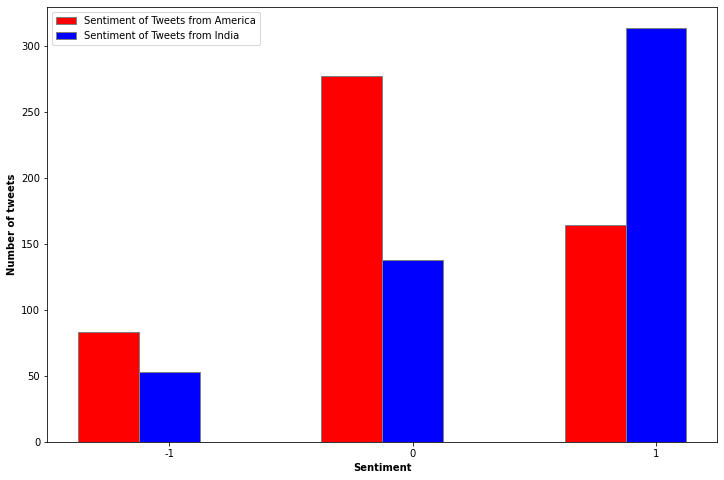

In [62]:
sentiment_India = df_India['sentiment'].tolist()
sentiment_America = df_America['sentiment'].tolist()

zero_i = 0
one_i = 0
mone_i = 0

for item in sentiment_India:
    if item == 0:
        zero_i = zero_i + 1
    if item == 1:
        one_i = one_i + 1
    if item == -1:
        mone_i = mone_i + 1
        
list_i = []
list_i.append(mone_i)
list_i.append(zero_i)
list_i.append(one_i)
 
zero_a = 0
one_a = 0
mone_a = 0

for item in sentiment_America:
    if item == 0:
        zero_a = zero_a + 1
    if item == 1:
        one_a = one_a + 1
    if item == -1:
        mone_a = mone_a + 1
        
list_a = []
list_a.append(mone_a)
list_a.append(zero_a)
list_a.append(one_a)

print(list_i)
print(list_a)
        
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(list_i)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, list_a, color ='r', width = barWidth, 
        edgecolor ='grey', label ='America') 
plt.bar(br2, list_i, color ='b', width = barWidth, 
        edgecolor ='grey', label ='India') 

plt.xlabel('Sentiment', fontweight ='bold') 
plt.ylabel('Number of tweets', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(list_a))], 
           ['-1','0','1']) 

plt.legend(["Sentiment of Tweets from America", "Sentiment of Tweets from India"])
   
plt.show() 